<p style="text-align: center;"><strong> FACULDADE DE ENGENHARIA DE SOROCABA - FACENS</strong>
    <br />
    PÓS GRADUAÇÃO EM ESPECIALIZAÇÃO EM CIÊNCIA DE DADOS
</p>
<h2>&nbsp;</h2>

<p style="text-align: center;"><strong>ALEX COELHO ABRANTES</strong></p>
<p style="text-align: center;"><strong>BRUNO ALVES COMITRE</strong></p>
<h2>&nbsp;</h2>
<p style="text-align: center;"><strong>DETECÇÃO AUTOMATIZADA DE NOTÍCIAS FALSAS:</strong></p>
<p style="text-align: center;"><strong>PESQUISA COM RECONHECIMENTO DE INTEGRIDADE DAS INFORMAÇÕES</strong></p>
<h2>&nbsp;</h2>

<p style="text-align: right;">Tese apresentada ao Programa de P&oacute;s-Gradua&ccedil;&atilde;o <br />
em Ci&ecirc;ncias de Dados da Faculdade de Engenharia de <br />
Sorocaba - FACENS, como requisito parcial para a obten&ccedil;&atilde;o <br />
do t&iacute;tulo de P&oacute;s Graduado em Ci&ecirc;ncia de Dados. <br />
</p>

<p style="text-align: right;"> Orientado: Prof. Matheus Mota</p>
<p style="text-align: right;"> Coord.: Prof. Fernando Vieira da Silva </p>
<h2>&nbsp;</h2>

<p style="text-align: center;">SOROCABA</p>
<p style="text-align: center;">2019</p>
<h2>&nbsp;</h2>

***

<p style="text-align: center;"><strong>SUMÁRIO</strong></p>
<p style="text-align: center;">&nbsp;</p>

<ul>
    <li><a href='#analise_exploratoria'>1. Análise Explorátoria</a></li>
    <ul>
        <li><a href='#imports'>1.1 Imports</a></li>
        <li><a href='#leitura_dataset'>1.2 Leitura do Dataset</a></li>
        <li><a href='#classificacao_features'>1.3 Classificação das Features</a></li>
        <li><a href='#dicionario_dados'>1.4 Dicionário dos Dados</a></li>
        <li><a href='#analise_dados'>1.5 Análise dos Dados</a></li>
        <li><a href='#dados_faltantes'>1.6 Dados Faltantes</a></li>
        <li><a href='#novas_features'>1.7 Novos Recursos (Features)</a></li>
        <ul>
            <li><a href='#recursos_palavras'> 1.7.1 Recursos por Palavras (Tokens) e Entidades</a></li>               
        </ul>
        <li><a href='#dados_desiquilibrados'>1.8 Dados Desiquilibrados e Random Shuffle</a></li>
        <li><a href='#export_csv'>1.9. Exportando Dataframe Refatorado CSV</a></li>
    </ul>
    <li><a href='#analise_grafica'>2 Análise Gráfica</a></li>
    <ul>
        <li><a href='#wordcloud'>2.1 WordCloud</a></li>
        <li><a href='#histograma'>2.2 Histograma</a></li>
        <ul>
            <li><a href='#histograma_qtd_palavras'>2.2.1 Histograma da Quantidade de Palavras</a></li>
            <li><a href='#histograma_qtd_adjetivos'>2.2.1 Histograma da Quantidade de Adjetivos</a></li>
        </ul>
        <li><a href='#boxplot'>2.3 Diagrama de Caixa</a></li>
        <ul>
            <li><a href='#boxplot_qtd_palavras'>2.3.1 Diagrama de Caixa da Quantidade de Palavras</a></li>
        </ul>
        <li><a href='#dispersao'>2.4 Gráfio de Dispersão</a></li>
        <ul>
            <li><a href='#dispersao_palavra_comprimento'>2.4.1 Dispersão de Palavras x Comprimento </a></li>
        </ul>
        <li><a href='#matriz_correlacao'>2.5 Matriz de correlação</a></li>
    </ul>
    <li><a href='#referencias'>REFERÊNCIAS</a></li>
</ul>

<a id='analise_exploratoria'></a>
# 1. Análise Explorátoria:

<p style="text-align: justify;"> 
Nesta fase do trabalho, inicialmente, faz necessário a aplicação de técnicas para manusear valores faltantes e fazer transformações de variáveis. Os dados serão ajustados e estreitando os presupostos para empregar técnicas gráficas e quantitativas, visando maximizar a obtenção de informações, tendências e detectação decomportamentos.
</p>

<a id='imports'></a>
## 1.1 Imports

In [1]:
!pip install names

import numpy as np
import pandas as pd
import csv
import random 
import pandas_profiling #conda install -c conda-forge pandas-profiling
import names #pip install names
import nltk
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import string
import spacy  # python -m spacy download en_core_web_md
from spacy import displacy
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas.io.json import json_normalize
from plotly import tools
from tqdm import tqdm


nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cliente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<a id='leitura_dataset'></a>
## 1.2 Leitura do Dataset

In [2]:
# Train Dataset
PATH_DATA_TRAIN = 'train.csv'

## arquivo disponivel em: https://drive.google.com/drive/folders/1LqNzxY8l0EgznlCD-g873VD-ys1BRN2-?fbclid=IwAR3PPLu4hgNdKfQDJzrLGwV6L42Vm3xBrrcquuCOR4ySS97bVvU46JDaR2s

train_data = pd.read_csv(PATH_DATA_TRAIN)
train_data = train_data.sample(frac = 1) # Randomly Smaple data, ratio is 100%
train_data.head()

,id,title,author,text,label
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
3998,3998,6 Natural Herbs To Prevent Mental Disorders,noreply@blogger.com (Alexander Light),6 Natural Herbs To Prevent Mental Disorders An...,1
14400,14400,Celebrities to Deplorables: YOU SUCK!,Subvet,"In Hillary's America, email server scrubs you ...",1
11025,11025,Damascus Bombings Near Pilgrimage Sites Kill D...,Ben Hubbard,"BEIRUT, Lebanon — A double bombing near Shi...",0
15753,15753,Low-Cost Wind Turbine to Power an Entire House...,Heather Callaghan,"By Amando Flavio For some time now, these word...",1


<a id='classificacao_features'></a>
## 1.3 Classificação das Features

In [3]:
table = [["id","Nominal Qualitativo"],["title","Nominal Qualitativo"],
         ["author","Nominal Qualitativo"],["text","Nominal Qualitativo"],
         ["label","Quantitativo Discreto"]]

filing = pd.DataFrame(table, columns=["Variável", "Classificação"])
filing

,Variável,Classificação
0,id,Nominal Qualitativo
1,title,Nominal Qualitativo
2,author,Nominal Qualitativo
3,text,Nominal Qualitativo
4,label,Quantitativo Discreto


<a id='dicionario_dados'></a>
## 1.4 Dicionário dos dados

O Dataset "fake news" contém as seguintes informações:


- **ID:** id único da notícia


- **TITLE:** título da notícia


- **AUTHOR:** autor da notícia


- **TEXT:** texto da notícia


- **LABEL:** rótulo que marca se a notícia é potencialmente não confiável
 - 1: não confiável
 - 0: confiável

<a id='analise_dados'></a>
## 1.5 Análise dos dados

<p style="text-align: justify;">
Ao importar os dados, é importante entender e identificar o intervalo de preditores específicos, identificar o tipo de dados de cada preditor, bem como calcular o número ou a porcentagem de valores omissos para cada preditor. Usaremos a biblioteca pandas_profiling, que fornece muitas funções extremamente úteis para a análise exploratória de dados.
</p>

<p style="text-align: justify;">
Observação: Foi retitado para demonstração a aleatoriedade dos dados
</p>

In [4]:
train_data_profiling = pd.read_csv(PATH_DATA_TRAIN)

In [5]:
profile = pandas_profiling.ProfileReport(train_data_profiling)
display(profile)

<a id='dados_faltantes'></a>
## 1.6 Dados Faltantes

<p style="text-align: justify;">
A falta de dados pode afetar a análise e o treinamento, que poderá levar a falhas no aprendizado. Então, é possível dizer se há dados ausentes no conjunto de dados? Sim, pelo relatório gerado por pandas_profiting, identificou-se:
</p>

<p style="text-align: justify;">
O título do atributo tem 558 amostras (2,68%) com valores ausentes.
</p>
<p style="text-align: justify;">
O autor do atributo possui 1957 amostras (9,41%) com valores ausentes.
</p>
<p style="text-align: justify;">
O texto do atributo tem 39 amostras (0,19%) com valores ausentes.
</p>
<p style="text-align: justify;">
Como existe dados faltantes nas 3 features do dataset (title, Author e Text) eliminar as linhas em que há dados ausentes neste caso é a melhor opção para não comprometer a análise e o treimento.
</p>

In [6]:
print('Antes do dropna tínhamos {} registros'.format(train_data.shape[0]))
train_data.dropna(inplace=True)
print('Depois do dropna temos {} registro'.format(train_data.shape[0]))

Antes do dropna tínhamos 20800 registros
Depois do dropna temos 18285 registro


<a id='novas_features'></a>
## 1.7 Novos Recursos (Features)

<p style="text-align: justify;">
Por fim, após os tratamentos dos dados, identificou-se a necessidade de criar novos recursos (features).
A Análise de texto não é uma das tarefas mais fácil a se fazer, embora, seja possível por meio de extração de informações por palavras obter uma melhor compreensão da construção de um texto. O objetivo da análise foi identificar o volume de vezes que determinado texto contém: exclamação, questão, simbolo, palavras únicas e suas classes gramaticais como: substantivos, adjetivos e verbos.
Entendemos ser importante identificar as entidades dentro dos contextos como: Pessoas, Grupos Politicos, Organizações, Valores monetários, Nações. Para extrair essas informações utilizou-se a biblioteca Spacy.
Com esses novos recursos serão utilizados nas análises gráficas e no aprendizado de máquina.
</p>

<a id='recursos_palavras'></a>
### 1.7.1 Recursos por Palavras (Tokens) e Entidades

In [7]:
print('Função retorna a POS TAG')
def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    #palavra
    noun = [w[0] for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')]
    adjective = [w[0] for w in pos_list if w[1] in ('JJ','JJR','JJS')]
    verb = [w[0] for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')]
    #quantidade
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    
    return[noun, adjective, verb, noun_count, adjective_count, verb_count]

tokenizer = RegexpTokenizer(r'\w+')

Função retorna a POS TAG


In [8]:
print('Função retorna tokens unicos')
def token_distint(df):
    list_words = []
    tokenizer = RegexpTokenizer(r'\w+')
    for item in df:
        for token in tokenizer.tokenize(item.lower()):        
            if not token in list_words:
                list_words.append(token)
    return list_words

Função retorna tokens unicos


In [9]:
print("Geração de recursos baseados nos titulos")
tokenizer = RegexpTokenizer(r'\w+')
for df in ([train_data]):
    df['title_token'] = df['title'].apply(lambda x : tokenizer.tokenize(x.lower()))
    df['title_token_distint'] = df['title'].apply(lambda x : token_distint(x)) 
    df['title_comprimento'] = df['title'].apply(lambda x : len(str(x)))
    df['title_num_palavras'] = df['title'].apply(lambda x: len(str(x).split()))                                         
    df['title_num_palavras_unicas'] = df['title'].apply(lambda x: len(set(w for w in str(x).split())))                                      
    df['title_palavras_vs_unico'] = df['title_num_palavras_unicas'] / df['title_num_palavras']
    df['title_substantivos'], df['title_adjetivos'], df['title_verbos'], df['title_contagem_substantivos'], df['title_contagem_adjetivos'], df['title_contagem_verbos'] = zip(*df['title'].apply(lambda text: tag_part_of_speech(str(text))))

Geração de recursos baseados nos titulos


In [10]:
print("Geração de recursos baseados nos textos")
tokenizer = RegexpTokenizer(r'\w+')
for df in ([train_data]):
    df['text_token'] = df['text'].apply(lambda x : tokenizer.tokenize(x.lower()))
    df['text_token_distint'] = df['text'].apply(lambda x : token_distint(x))
    df['text_comprimento'] = df['text'].apply(lambda x : len(str(x)))
    df['text_num_palavras'] = df['text'].apply(lambda x: len(str(x).split()))                                         
    df['text_num_palavras_unicas'] = df['text'].apply(lambda x: len(set(w for w in str(x).split())))                                      
    df['text_palavras_vs_unico'] = df['text_num_palavras_unicas'] / df['text_num_palavras']
    df['text_substantivos'], df['text_adjetivos'], df['text_verbos'], df['text_contagem_substantivos'], df['text_contagem_adjetivos'], df['text_contagem_verbos'] = zip(*df['text'].apply(lambda text: tag_part_of_speech(str(text))))

Geração de recursos baseados nos textos


<a id='dados_desiquilibrados'></a>
## 1.8 Dados Desiquilibrados e Random Shuflle

<p style="text-align: justify;">
Após eliminar as linhas de dados faltantes, aplicou-se uma análise descritiva para verificar se houve desequilíbrio nos dados, constatou-se que a média de 43% da feature Label, na qual armazena valores de 0 ou 1 (não confiáveis e confiáveis) mostra que os dados estão em desequilibrio, constando uma diferença de 2437 registros com o valor 1 (confiáveis) a mais que o valor 0 (não confiáveis). Para manter o conjunto de dados equilibrado aplicou-se o Random Shuffle nos registros com valor 1 (confiáveis) considerando o valor de 7924 registros que é o número total de dados (não confiáveis). 
</p>

In [11]:
train_data.label.describe()

count    18285.000000
mean         0.433361
std          0.495553
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [12]:
unreliable = train_data[train_data['label'] == 1]
print('Não confiável：', len(unreliable))

reliable = train_data[train_data['label'] == 0]
print('Confiável：', len(reliable))

print('Desequilibrio nos dados de {} registros confiáveis'.format(len(reliable) - len(unreliable)))

Não confiável： 7924
Confiável： 10361
Desequilibrio nos dados de 2437 registros confiáveis


In [13]:
print('aplicando Random Shuffle')
mean = min(len(unreliable), len(reliable))

un_data = unreliable.sample(n = mean)
print('Não confiável：', len(un_data))
r_data = reliable.sample(n = mean)
print('Confiável：', len(r_data))

train_data = pd.concat([un_data, r_data])

aplicando Random Shuffle
Não confiável： 7924
Confiável： 7924


<a id='export_csv'></a>
## 1.9. Exportando Dataframe Refatorado CSV:

<p style="text-align: justify;">
A sáida de todos os tratamentos dos dados será utilizada na próxima etapa que será o desenvolvimento de um aprendizado de máquina com deep leraning.
</p>

In [14]:
train_data.to_csv ('train_refatorado.csv', index = None, header=True)

<a id='novas_features'></a>
# 2 Análise Gráfica

<p style="text-align: justify;">
<ul>
    <li>Gerar um WordCloud com todos os títulos e textos e analisar as palavras mais utilizadas.</li>
    <li>Gerar um histograma referente ao tamanho dos títulos e textos. Será que existe diferença de tamanho (caracteres) para os títulos e textos confiáveis e não confiáveis?</li>
    <li>Gerar um boxplot referente a quantidade de palavras dos títulos e textos e analisar os valores mínimos, máximos, primeiro e terceiro quartil, mediana e existência de outliers. Será que existe diferença de entre confiáveis e não confiáveis?</li>
    <li>Podemos verificar alguma correlação entre os novos recursos?</li>
    <li>A forma de escrita do texto (exemplos: educado, rude, gírias, etc…) tem influência no sentimento Confiável e Não Confiável?</li>    
</ul>
</p>

<p style="text-align: justify;">
Utilizamos o arquivo de saída da análise explorátoria, train_refatorado.csv para utilizar os novos recursos criados. Primeiramente, repetimos o processo de importação do dataset e separamos os textos confiáveis e não confiáveis.
</p>

<a id='wordcloud'></a>
## 2.1 WordCloud

In [15]:
print('Função para listar as palavras')
def list_words(data):
    l_words = []
    tokenizer = RegexpTokenizer(r'\w+')
    for tokens in data:
        for token in tokens:
            l_words.append(token)    
    return l_words

Função para listar as palavras


In [16]:
print('Função que plota o gráfico de Words Cloud')
def words_cloud(confiavel, nao_confiavel, title):
    

    ## Palavras dentro do texto
    words = list_words(confiavel)
    text_confiavel = " ".join(review for review in words)
    
    words = list_words(nao_confiavel)
    text_nao_confiavel = " ".join(review for review in words)

    ## Carregando a lista de stopwords
    stopwords = nltk.corpus.stopwords.words('english')

    # Generate a word cloud image
    wordcloud_confiavel = WordCloud(stopwords=stopwords, background_color="white", width=1000, height=800, margin=0, collocations=False).generate(text_confiavel)
    wordcloud_nao_confiavel = WordCloud(stopwords=stopwords, background_color="white", width=1000, height=800, margin=0, collocations=False).generate(text_nao_confiavel)

    ## plotagem
    #plt.figure(1)
    plt.figure(figsize=(12,8))
    
    plt.subplot(121)
    plt.imshow(wordcloud_confiavel, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0,y=0)
    plt.title(title + ' Confiáveis')
    plt.legend()

    plt.subplot(122)
    plt.imshow(wordcloud_nao_confiavel, interpolation='bilinear')
    plt.axis('off')
    plt.margins(x=0,y=0)
    plt.title(title + ' Não Confiáveis')
    plt.legend()

    plt.show()

Função que plota o gráfico de Words Cloud


No handles with labels found to put in legend.
No handles with labels found to put in legend.


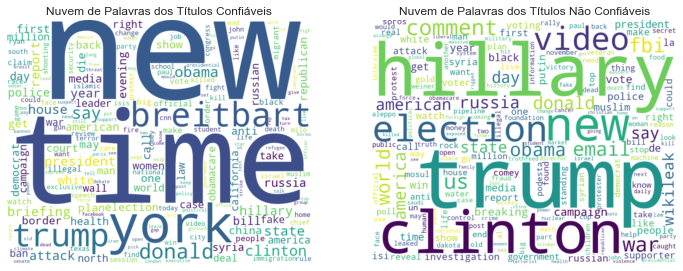

No handles with labels found to put in legend.
No handles with labels found to put in legend.


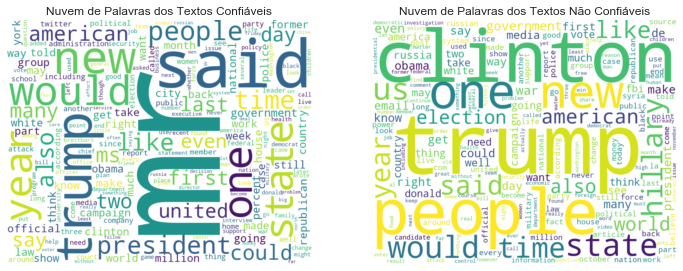

No handles with labels found to put in legend.
No handles with labels found to put in legend.


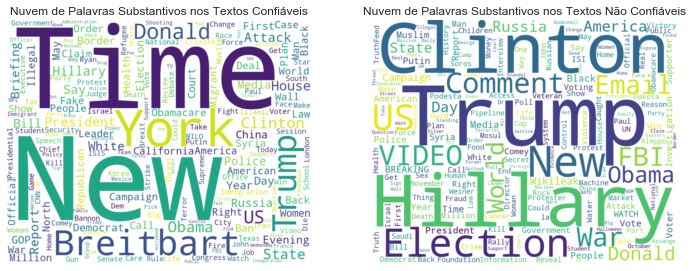

No handles with labels found to put in legend.
No handles with labels found to put in legend.


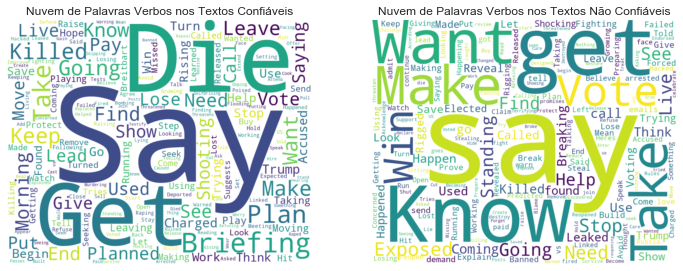

No handles with labels found to put in legend.
No handles with labels found to put in legend.


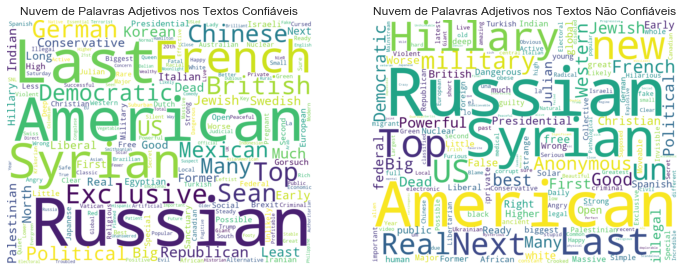

In [17]:
words_cloud(reliable['title_token'], unreliable['title_token'], 'Nuvem de Palavras dos Títulos')
words_cloud(reliable['text_token'], unreliable['text_token'], 'Nuvem de Palavras dos Textos')
words_cloud(reliable['title_substantivos'], unreliable['title_substantivos'], 'Nuvem de Palavras Substantivos nos Textos')
words_cloud(reliable['title_verbos'], unreliable['title_verbos'], 'Nuvem de Palavras Verbos nos Textos')
words_cloud(reliable['title_adjetivos'], unreliable['title_adjetivos'], 'Nuvem de Palavras Adjetivos nos Textos')

<a id='histograma'></a>
## 2.2 Histograma

<p style="text-align: justify;">
A construção de histogramas tem caráter preliminar em qualquer estudo e é um importante indicador da distribuição de dados. Neste estudo utiliza-se a frequência absoluta, que é o número que representa a quantidade de dados em uma determinada amostra ou o intervalo de classe especifico, indicando a frequência (absoluta) com que uma classe aparece no conjunto de dados.
</p>
<p style="text-align: justify;">A seguir, os gráficos abaixo representam os histogramas de Títulos e Textos. Estes gráficos facilitam no entendimento e na analise da existência de influência na avaliação: Confiável ou Não Confiável.
</p>

<a id='histograma_qtd_palavras'></a>
### 2.2.1 Histograma do Quantidade de Palavras

C:\Users\cliente\Anaconda3\envs\University\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\Users\cliente\Anaconda3\envs\University\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



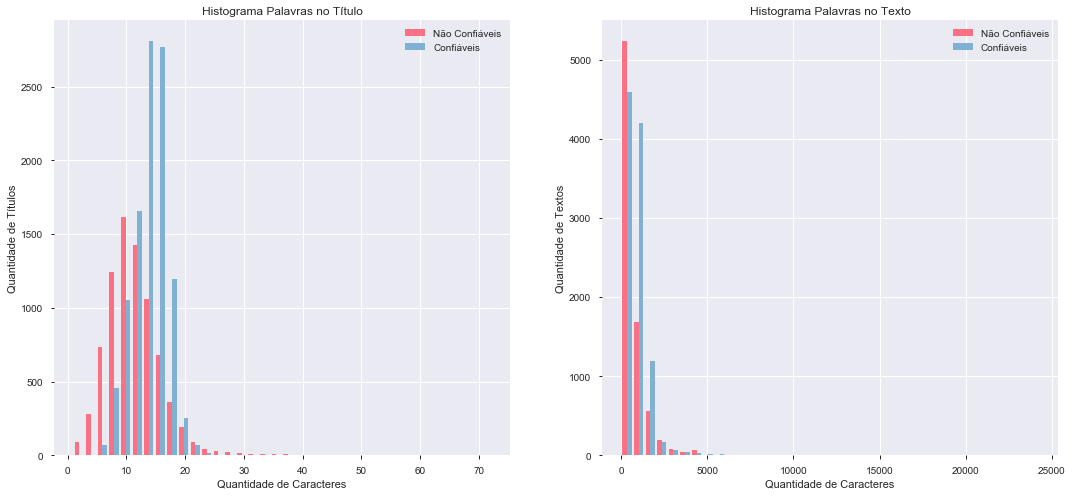

In [18]:
labels = ['Não Confiáveis','Confiáveis']
colors = ['#fb7082','#80b1d3']

plt.figure(figsize=(18,8))
plt.subplot(121)
plt.hist([unreliable.title_num_palavras,reliable.title_num_palavras], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Títulos')
plt.title('Histograma Palavras no Título')
plt.legend()


plt.subplot(122)
plt.hist([unreliable.text_num_palavras,reliable.text_num_palavras], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Textos')
plt.title('Histograma Palavras no Texto')
plt.legend()

plt.show()

<a id='histograma_qtd_adjetivos'></a>
### 2.2.2 Histograma da Quantidade de Adjetivos

C:\Users\cliente\Anaconda3\envs\University\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\Users\cliente\Anaconda3\envs\University\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



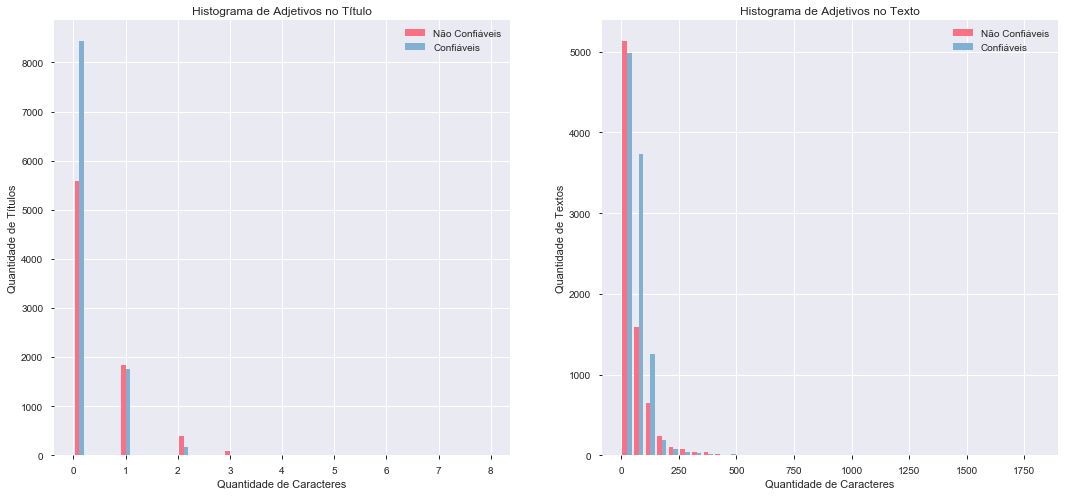

In [19]:
labels = ['Não Confiáveis','Confiáveis']
colors = ['#fb7082','#80b1d3']

plt.figure(figsize=(18,8))
plt.subplot(121)
plt.hist([unreliable.title_contagem_adjetivos,reliable.title_contagem_adjetivos], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Títulos')
plt.title('Histograma de Adjetivos no Título')
plt.legend()


plt.subplot(122)
plt.hist([unreliable.text_contagem_adjetivos,reliable.text_contagem_adjetivos], bins=int(180/5), normed=False, color = colors, label=labels)
plt.xlabel('Quantidade de Caracteres')
plt.ylabel('Quantidade de Textos')
plt.title('Histograma de Adjetivos no Texto')
plt.legend()

plt.show()

<a id='boxplot'></a>
## 2.3 Diagrama de Caixa

<p style="text-align: justify;">
O diagrama de caixa é construído utilizando as referências de valores mínimos e máximos, primeiro e terceiro quartil, mediana e os outliers da base de dados. Diferentemente do histograma que é melhor para visualização de média e desvio padrão, o diagrama de caixa têm como objetivo estudar as medidas estatística e identificar os valores atípicos dentro do conjunto de dados.
</p>

<a id='boxplot_qtd_palavras'></a>
### 2.3.1 Diagrama de Caixa da Quantidade de Palavras

In [26]:
confiavel = go.Box(y=reliable.title_comprimento, name = 'confiável', boxmean=True)
nao_confiavel = go.Box(y=unreliable.title_comprimento, name = 'não confiáveis', boxmean=True)
data = [confiavel, nao_confiavel]
layout = go.Layout(title = "Diagrama de Caixa da Quantidade de Palavras dos Títulos")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [27]:
confiavel = go.Box(y=reliable.text_comprimento, name = 'confiável', boxmean=True)
nao_confiavel = go.Box(y=unreliable.text_comprimento, name = 'não confiáveis', boxmean=True)
data = [confiavel, nao_confiavel]
layout = go.Layout(title = "Diagrama de Caixa da Quantidade de Palavras dos Textos")
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

<a id='dispersao'></a>
## 2.4 Gráfico de Dispersão

<p style="text-align: justify;">
Gráfico de Dispersão são utilizados para pontuar dados em um eixo vertical e horizontal com a intenção de exibir quanto uma variável é afetada por outra.Há vários tipos de associações entre parâmetros que podem ser demonstradas pelo gráfico de dispersão. A relação pode ser positiva ou negativa (quando um cresce o outro decresce), fraca ou forte, linear ou não linear.
</p>
<p style="text-align: justify;">A seguir, os gráficos abaixo representam a dispersão de total de palavras x total de comprimento do texto confiável e não confiável. A relação pode ser devida a outro parâmetro que esteja associado a cada um dos parâmetros estudados.
</p>

<a id='dispersao_palavra_comprimento'></a>
### 2.4.1 Dispersão Palavras x Comprimento

Text(0.5, 1.0, 'Dispersão de Total de Palavras x Total de Comprimento do Texto Não Confiável')

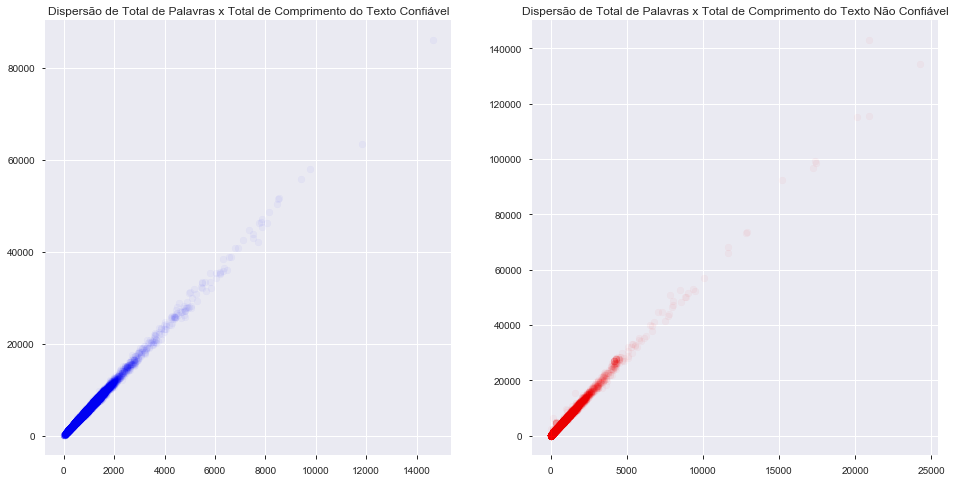

In [22]:
alpha = 0.03
plt.figure(figsize=(16,8))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(reliable.text_num_palavras, reliable.text_comprimento, color='blue', alpha=alpha)
plt.title('Dispersão de Total de Palavras x Total de Comprimento do Texto Confiável')

# lat and lon
plt.subplot(122)
plt.scatter(unreliable.text_num_palavras, unreliable.text_comprimento, color='red', alpha=alpha)
plt.title('Dispersão de Total de Palavras x Total de Comprimento do Texto Não Confiável')

<a id='matriz_correlacao'></a>
## 2.5 Matriz de correlação

<p style="text-align: justify;">
A matriz de correlação mostra os valores de correlação de Pearson, que medem o grau de relação linear entre cada par de itens ou variáveis. Os valores de correlação podem cair entre -1 e +1. Uma vez feita a segmentação das variáveis, podemos efetuar uma verificação de correlação mais concisa entre as variáveis de cada segmento,obtendo assim uma compreensção dos dados positivamente e negativamente relacionadas.
</p>
<p style="text-align: justify;">A seguir, os gráficos abaixo representam a correlação da análise entre os recursos dos confiáveis e não confiáveis. Estes gráficos facilitam no entendimento e na análise dos padrões em sua área do número de itens na análise: Confiável ou Não Confiável.
</p>

In [23]:
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
np.random.seed(13)

color = sns.color_palette()
%matplotlib inline

<p style="text-align: justify;">
Com as variáveis extraídas por meio da análise por palavra, se tornou possível criar relacionamentos e identicar quais desses relacionamento se correlacionam entre si.
</p>

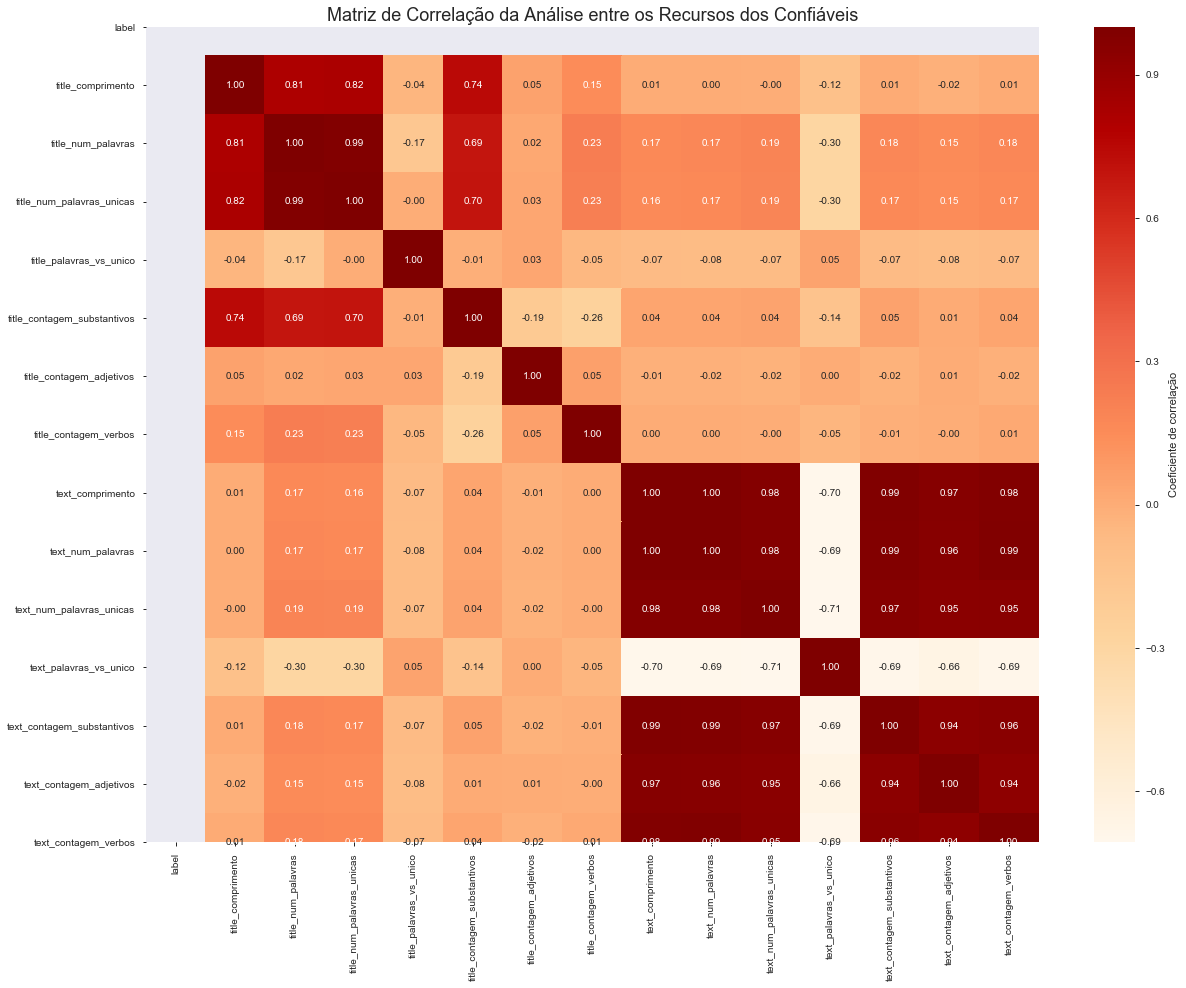

In [24]:
corr_reliable = reliable.drop(columns=['id', 'title', 'author', 'text', 'title_token','text_token','title_substantivos','title_adjetivos','title_verbos','text_substantivos',
                              'text_adjetivos','text_verbos'])

f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(corr_reliable.corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Coeficiente de correlação'}, cmap='OrRd')
ax.set_title("Matriz de Correlação da Análise entre os Recursos dos Confiáveis", fontsize=18)
plt.show()

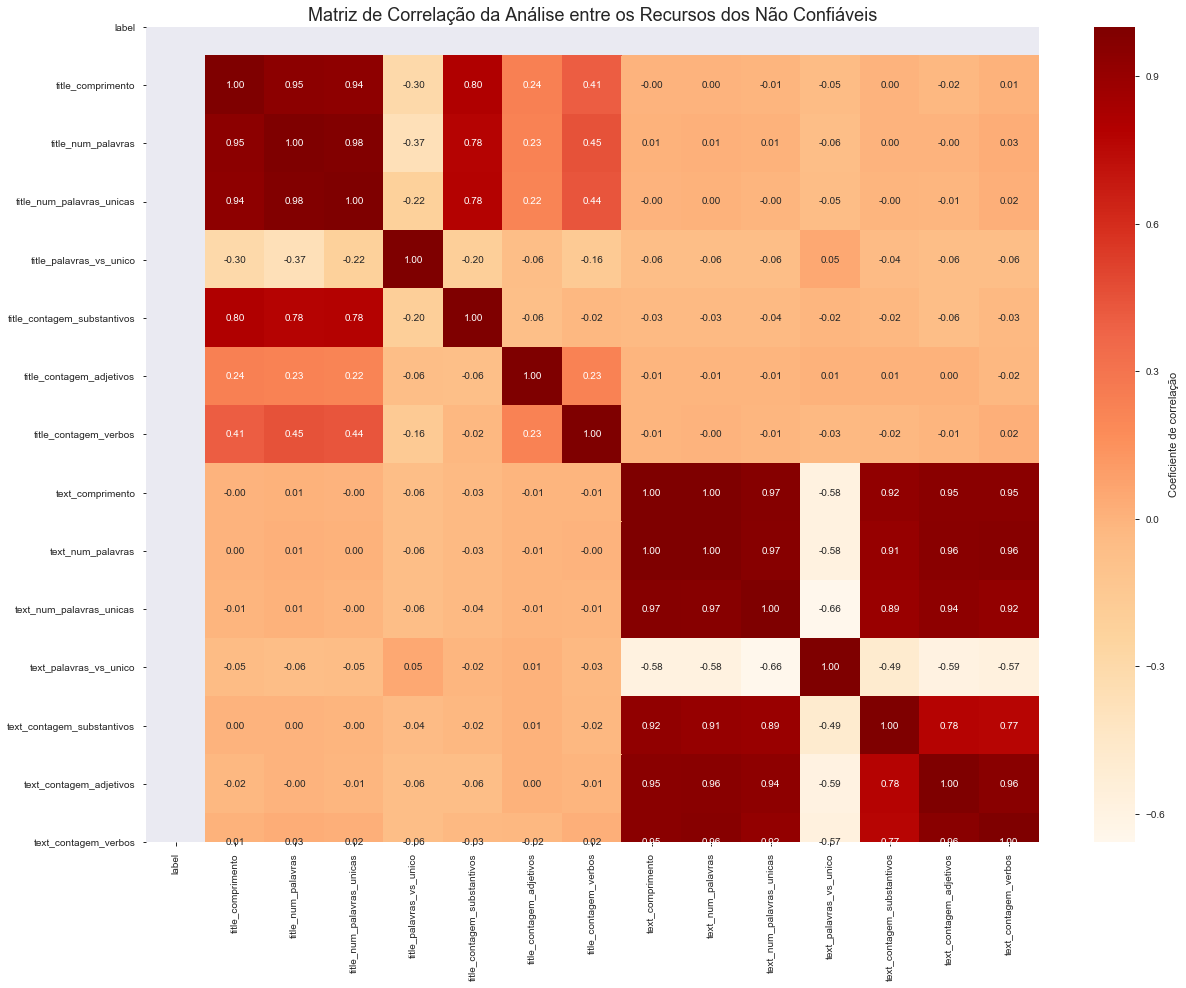

In [25]:
corr_unreliable = unreliable.drop(columns=['id', 'title', 'author', 'text', 'title_token','text_token','title_substantivos','title_adjetivos','title_verbos','text_substantivos',
                              'text_adjetivos','text_verbos'])

f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(corr_unreliable.corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Coeficiente de correlação'}, cmap='OrRd')
ax.set_title("Matriz de Correlação da Análise entre os Recursos dos Não Confiáveis", fontsize=18)
plt.show()

<a id='referencias'></a>
<p style="text-align: left;"><strong>REFER&Ecirc;NCIAS</strong></p>

<p style="text-align: justify;">[1] SHAHEBAZ, Mohammad. Hand Crafted Feature Engineering For Insincerity. Dispon&iacute;vel em: &lt;https://www.kaggle.com/shaz13/feature-engineering-for-nlp-classification/notebook#Tagging-Parts-Of-Speech-And-More-Feature-Engineering;. Acesso em: 14 set. 2019.</p>

<h2>&nbsp;</h2>

*INSTALLED VERSIONS*

In [28]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.1.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: AMD64 Family 23 Model 8 Stepping 2, AuthenticAMD
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: 5.0.1
pip: 19.1.1
setuptools: 41.0.1
Cython: None
numpy: 1.16.4
scipy: 1.2.1
pyarrow: None
xarray: None
IPython: 7.5.0
sphinx: None
patsy: None
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 3.1.1
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: 4.3.4
bs4: None
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10.1
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


<h2>&nbsp;</h2>

***